In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

data = {} # key: HH:MM -> {'0':, '1':, '2':, '-2':, '-1':}
with open('../emotion_time.txt', 'r') as f:
    for line in f:
        l = line.split()
        time_label = l[0]
        count = int(l[1])
        
        l = time_label.split(':')
        t = l[0] + ':' + l[1]
        label = int(l[2])
        
        d = data.get(t, [0] * 5)
        d[label] = count
        data[t] = d

moments = sorted(data)
num_tweets_m = [sum(data[t]) for t in moments]
pos_tweets_m = [data[t][1] for t in moments]
neg_tweets_m = [data[t][-1] for t in moments]

N = 24
n = len(pos_tweets_m) / N
num_tweets = [sum(num_tweets_m[i * n: (i+1) * n]) for i in range(N)]
pos_tweets = [sum(pos_tweets_m[i * n: (i+1) * n]) for i in range(N)]
neg_tweets = [sum(neg_tweets_m[i * n: (i+1) * n]) for i in range(N)]

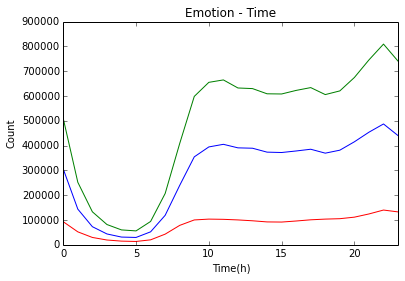

In [23]:
plt.plot(num_tweets, 'g')
plt.plot(pos_tweets, 'b')
plt.plot(neg_tweets, 'r')

plt.ylabel('Count')
plt.xlabel('Time(h)')
plt.title('Emotion - Time')
plt.xlim([0, 23])

plt.savefig('emotion_time_1.png', dpi = 600)

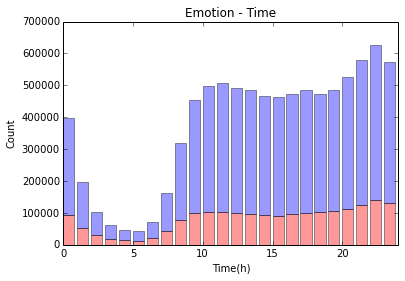

In [18]:
ind = np.arange(N)    # the x locations for the groups
np_num_tweets = np.array(num_tweets)

p1 = plt.bar(ind, neg_tweets, color='r', alpha=0.4)
p2 = plt.bar(ind, pos_tweets, color='b', bottom=neg_tweets, alpha=0.4)

plt.ylabel('Count')
plt.xlabel('Time(h)')
plt.title('Emotion - Time')
plt.xlim([0, 24])

plt.savefig('emotion_time_2.png', dpi = 600)

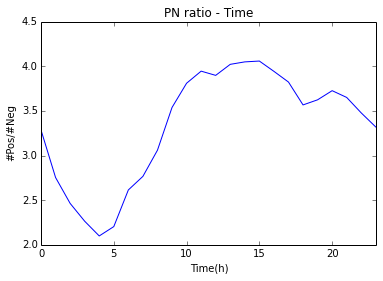

In [21]:
pn_ratio = [float(pos_tweets[i]) / neg_tweets[i] for i in range(len(pos_tweets))]

plt.ylabel('#Pos/#Neg')
plt.xlabel('Time(h)')
plt.title('PN ratio - Time')
plt.xlim([0, 23])

plt.plot(pn_ratio)
plt.savefig('emotion_time_3.png', dpi = 600)

In [ ]:
3